## SDSS RR Lyrae Light Curves

In [1]:
import pandas as pd
import astroquery
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u
import pandas as pd

In [68]:
# Define column names
column_names = [
    "Num", "RAdeg", "DEdeg", "Ar", "Dis", "RGC", "umag", 
    "gmag", "rmag", "imag", "zmag", "Vmag", "u-g", "e_u-g", "g-r", "e_g-r"
]

filename = '../data/sdss_rrlyrae.txt'
# Read the data into a DataFrame
reference_df = pd.read_csv(filename, delim_whitespace=True, names=column_names)

/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_49190/4005925204.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  reference_df = pd.read_csv(filename, delim_whitespace=True, names=column_names)


In [69]:
reference_df

,Num,RAdeg,DEdeg,Ar,Dis,RGC,umag,gmag,rmag,imag,zmag,Vmag,u-g,e_u-g,g-r,e_g-r
0,4099,0.935679,1.115859,0.089,17.75,20.03,18.134,16.989,16.777,16.703,16.685,16.846,1.100,0.018,0.279,0.007
1,13350,0.283437,1.178522,0.080,24.77,26.55,18.839,17.679,17.544,17.497,17.501,17.570,1.161,0.009,0.256,0.009
2,15927,3.254658,-0.584066,0.090,29.12,30.96,19.288,18.058,17.859,17.792,17.780,17.921,1.244,0.023,0.283,0.011
3,20406,3.244369,0.218891,0.088,9.13,12.76,16.715,15.543,15.336,15.286,15.276,15.403,1.179,0.007,0.270,0.004
4,21992,4.315354,1.054582,0.077,7.35,11.54,16.186,15.040,14.909,14.864,14.853,14.932,1.126,0.005,0.250,0.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,4956681,58.700931,1.228830,1.051,36.88,43.44,19.476,18.513,18.454,18.480,18.505,18.434,1.021,0.084,0.208,0.015
479,4983075,57.156605,0.134676,0.527,29.15,35.64,19.114,18.054,17.869,17.818,17.842,17.923,1.053,0.009,0.238,0.005
480,4984662,57.128875,-0.389138,0.584,39.05,45.43,19.745,18.701,18.489,18.454,18.452,18.558,1.022,0.053,0.253,0.019
481,4992418,57.151443,0.892965,0.479,31.46,37.97,19.279,18.214,18.042,18.000,17.997,18.089,1.065,0.041,0.276,0.008


In [149]:

# Search radius (0.001 degrees ~ 3.6 arcseconds)
radius = 0.001 * u.deg

# Initialize an empty list to hold results
all_results = []

# Iterate through each row in reference_df
for _, row in reference_df.iterrows():
    num = row["Num"]
    ra = row["RAdeg"]
    dec = row["DEdeg"]
    
    print(f"Querying SDSS for Num={num}, RA={ra}, DEC={dec}")
    
    # Set up the coordinates
    coord = coords.SkyCoord(ra, dec, unit="deg")
    
    try:
        # Query SDSS for photometric data
        result = SDSS.query_region(
            coord, radius=radius, spectro=False,
            photoobj_fields=['ra', 'dec', 'mjd', 'psfMag_u', 'psfMag_g', 
                             'psfMag_r', 'psfMag_i', 'psfMag_z']
        )
        
        # If results are found, convert to DataFrame and add "Num"
        if result is not None:
            temp_df = result.to_pandas()
            temp_df["Num"] = num  # Add reference Num to the results
            all_results.append(temp_df)
        else:
            print(f"No data found for Num={num}")
    
    except Exception as e:
        print(f"Error querying SDSS for Num={num}: {e}")

# Combine all results into a single DataFrame
if all_results:
    rrl_df = pd.concat(all_results, ignore_index=True)
    print("Final DataFrame:")
    print(rrl_df.head())
else:
    print("No results found for any objects.")

Querying SDSS for Num=4099.0, RA=0.935679, DEC=1.115859
Querying SDSS for Num=13350.0, RA=0.283437, DEC=1.178522
Querying SDSS for Num=15927.0, RA=3.254658, DEC=-0.584066
Querying SDSS for Num=20406.0, RA=3.244369, DEC=0.218891
Querying SDSS for Num=21992.0, RA=4.315354, DEC=1.054582
Querying SDSS for Num=27887.0, RA=3.173891, DEC=-0.46073
Querying SDSS for Num=46988.0, RA=2.426843, DEC=-0.562932
Querying SDSS for Num=74260.0, RA=2.150327, DEC=0.659596
Querying SDSS for Num=75433.0, RA=0.361418, DEC=-0.22898
Querying SDSS for Num=75486.0, RA=2.837662, DEC=0.170581
Querying SDSS for Num=91658.0, RA=0.846748, DEC=-0.994204
Querying SDSS for Num=92912.0, RA=4.503006, DEC=1.073571
Querying SDSS for Num=93149.0, RA=2.629534, DEC=1.025659
Querying SDSS for Num=98874.0, RA=2.575331, DEC=1.170507
Querying SDSS for Num=114272.0, RA=0.635704, DEC=0.568561
Querying SDSS for Num=128795.0, RA=2.015478, DEC=-1.099428
Querying SDSS for Num=133858.0, RA=0.630052, DEC=-0.604745
Querying SDSS for Num=15

In [150]:
# Function to remove outliers
def remove_outliers(df, group_col, threshold=5):
    """
    Remove rows from the DataFrame where numeric values deviate 
    from the group's mean by more than 'threshold' standard deviations.
    """
    def filter_group(group):
        # Calculate group mean and std for each column
        group_mean = group.mean()
        group_std = group.std()
        
        # Apply threshold filtering for all numeric columns
        return group[(group - group_mean).abs() <= threshold * group_std].dropna()

    # Apply filtering group by group
    return df.groupby(group_col, group_keys=False).apply(filter_group)

# Replace invalid values (-9999) with NaN
rrl_df = rrl_df.replace(-9999.0, pd.NA).dropna()

# Remove outliers from rrl_df
cleaned_rrl_df = remove_outliers(rrl_df, group_col="Num")

/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_49190/2895731968.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col, group_keys=False).apply(filter_group)


In [161]:
print(len(rrl_df))
print(len(cleaned_rrl_df))

19538
19460


In [162]:
cleaned_rrl_df.to_csv('../data/rrl_mags.csv', index=False)

In [163]:
rrl_df = pd.read_csv('../data/rrl_mags.csv', index_col=0)

In [164]:
from astropy.time import Time

In [165]:

rrl_star_df = rrl_df[rrl_df['Num'] == 21992.0].reset_index()

rrl_star_df['mjd'].apply(lambda x: Time(x, format='mjd').iso)
# Time(mjd, format='mjd')

0     2001-12-10 00:00:00.000
1     2001-10-14 00:00:00.000
2     2001-10-15 00:00:00.000
3     2001-11-12 00:00:00.000
4     2001-11-12 00:00:00.000
               ...           
75    2004-10-10 00:00:00.000
76    2004-11-05 00:00:00.000
77    2004-11-05 00:00:00.000
78    2002-10-10 00:00:00.000
79    2003-10-24 00:00:00.000
Name: mjd, Length: 80, dtype: object

In [167]:
rrl_df.groupby('Num').size()

Num
4099.0       46
13350.0      60
15927.0      49
20406.0      44
21992.0      80
             ..
4956681.0    37
4983075.0    28
4984662.0    38
4992418.0    40
5011634.0    68
Length: 483, dtype: int64

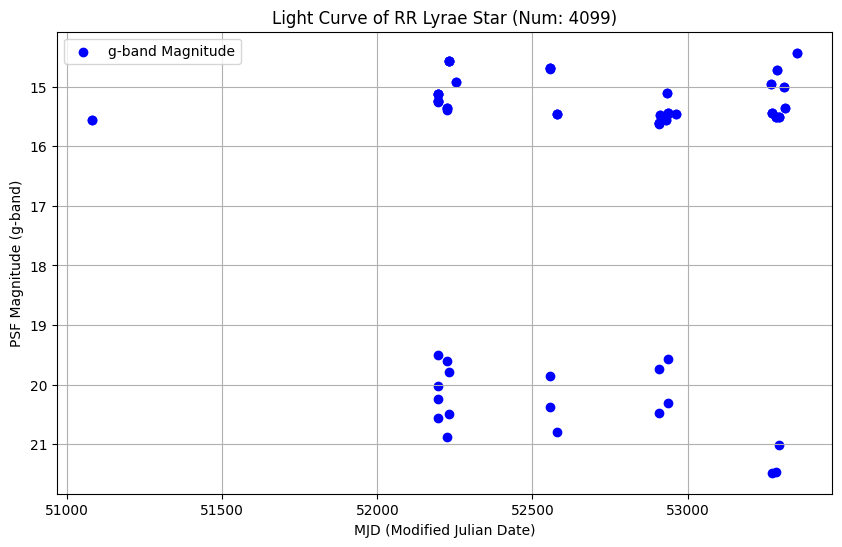

In [168]:
import matplotlib.pyplot as plt

# Filter the rrl_df DataFrame for Num = 4099
rrl_star_df = rrl_df[rrl_df['Num'] == 21992.0]

# Sort the DataFrame by MJD for better plotting
rrl_star_df = rrl_star_df.sort_values(by='mjd')

# Plot the light curve
plt.figure(figsize=(10, 6))
plt.scatter(rrl_star_df['mjd'], rrl_star_df['psfMag_g'], color='blue', label='g-band Magnitude')
plt.gca().invert_yaxis()  # Invert y-axis since magnitudes are brighter at lower values

# Plot settings
plt.title("Light Curve of RR Lyrae Star (Num: 4099)")
plt.xlabel("MJD (Modified Julian Date)")
plt.ylabel("PSF Magnitude (g-band)")
plt.legend()
plt.grid()

# Show the plot
plt.show()


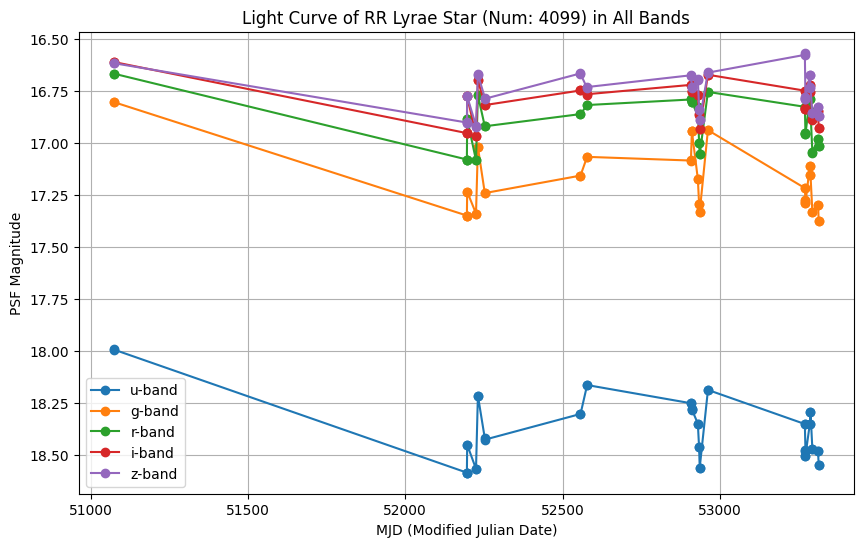

In [124]:
import matplotlib.pyplot as plt

# Filter the rrl_df DataFrame for Num = 4099
rrl_star_df = rrl_df[rrl_df['Num'] == 4099]

# Sort the DataFrame by MJD
rrl_star_df = rrl_star_df.sort_values(by='mjd')

# Plot the magnitudes in all bands
plt.figure(figsize=(10, 6))

# Plot each magnitude band against MJD
plt.plot(rrl_star_df['mjd'], rrl_star_df['psfMag_u'], label='u-band', marker='o')
plt.plot(rrl_star_df['mjd'], rrl_star_df['psfMag_g'], label='g-band', marker='o')
plt.plot(rrl_star_df['mjd'], rrl_star_df['psfMag_r'], label='r-band', marker='o')
plt.plot(rrl_star_df['mjd'], rrl_star_df['psfMag_i'], label='i-band', marker='o')
plt.plot(rrl_star_df['mjd'], rrl_star_df['psfMag_z'], label='z-band', marker='o')

# Invert the y-axis (since lower magnitudes mean brighter objects)
plt.gca().invert_yaxis()

# Add labels, legend, and grid
plt.title("Light Curve of RR Lyrae Star (Num: 4099) in All Bands")
plt.xlabel("MJD (Modified Julian Date)")
plt.ylabel("PSF Magnitude")
plt.legend()
plt.grid()

# Show the plot
plt.show()


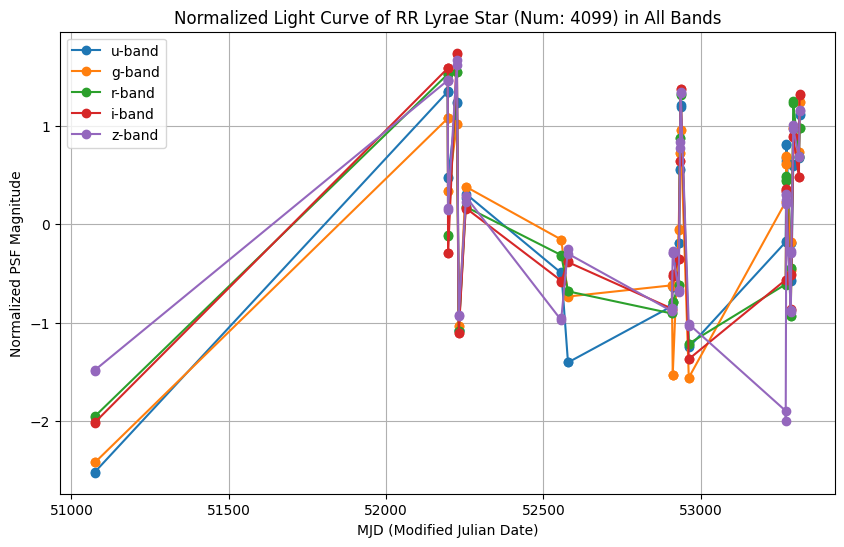

In [136]:
import matplotlib.pyplot as plt

# Filter the rrl_df DataFrame for Num = 4099
rrl_star_df = rrl_df[rrl_df['Num'] == 4099]

# Sort the DataFrame by MJD
rrl_star_df = rrl_star_df.sort_values(by='mjd')

# Normalize each magnitude band
normalized_df = rrl_star_df.copy()
magnitude_cols = ['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z']

for col in magnitude_cols:
    normalized_df[col] = (rrl_star_df[col] - rrl_star_df[col].mean()) / rrl_star_df[col].std()

# Plot the normalized magnitudes
plt.figure(figsize=(10, 6))

# Plot each normalized band against MJD
plt.plot(normalized_df['mjd'], normalized_df['psfMag_u'], label='u-band', marker='o')
plt.plot(normalized_df['mjd'], normalized_df['psfMag_g'], label='g-band', marker='o')
plt.plot(normalized_df['mjd'], normalized_df['psfMag_r'], label='r-band', marker='o')
plt.plot(normalized_df['mjd'], normalized_df['psfMag_i'], label='i-band', marker='o')
plt.plot(normalized_df['mjd'], normalized_df['psfMag_z'], label='z-band', marker='o')

# Add plot settings
plt.title("Normalized Light Curve of RR Lyrae Star (Num: 4099) in All Bands")
plt.xlabel("MJD (Modified Julian Date)")
plt.ylabel("Normalized PSF Magnitude")
plt.legend()
plt.grid()

# plt.xlim(52170, 52200)

# Show the plot
plt.show()


In [127]:
from astroML.datasets import fetch_rrlyrae_mags
data = fetch_rrlyrae_mags()  

[========================================]  78.8kb / 78.8kb   


In [131]:
data.shape

(483,)

In [132]:
from astroML.datasets import fetch_rrlyrae_combined
data = fetch_rrlyrae_combined()  

downloading cross-matched SDSS/2MASS dataset from https://github.com/astroML/astroML-data/raw/main/datasets/stripe82calibStars_v2.6.dat.gz to /Users/dangause/astroML_data
[=========================================]  63.58Mb / 63.58Mb   
uncompressing file...


In [133]:
data

(array([[ 1.2509995 ,  0.39400005,  0.13700008,  0.06199932],
        [ 1.0480003 ,  0.3390007 ,  0.15199852,  0.02300072],
        [ 1.0080013 ,  0.34199905,  0.12899971,  0.20300102],
        ...,
        [ 1.0440006 ,  0.2119999 ,  0.03499985,  0.00200081],
        [ 1.0649986 ,  0.17200089,  0.04199982,  0.00300026],
        [ 1.1259995 ,  0.06500053, -0.0170002 , -0.05799866]],
       shape=(93141, 4), dtype=float32),
 array([0., 0., 0., ..., 1., 1., 1.], shape=(93141,)))